# BP decoding for [7, 4, 3] Hamming Code

You can see the logical error example.

In [247]:
from multiple_stabilizers import fill_Z_with_stabilizer_shape
from sympy import Matrix
import numpy as np
from multiple_stabilizers import get_condition_indices, generate_parity_check_matrix
from ldpc import BpDecoder
import ldpc.code_util
from ldpc import BpOsdDecoder

error_rate = 0.4

H_matrix = np.array([
    [1, 0, 1, 0, 1, 0, 1],
    [0, 1, 1, 0, 0, 1, 1],
    [0, 0, 0, 1, 1, 1, 1]
], dtype=int)

codeword = np.zeros((H_matrix.shape[1],), dtype=int)
print("Initial codeword (all zeros):")
print(codeword)

bpd = BpOsdDecoder(
    H_matrix,  # the parity check matrix
    error_rate=error_rate,
    # max_iter=1,  # the maximum number of iterations for BP
    bp_method="minimum_sum",  # the BP method
    ms_scaling_factor=0  # min sum scaling factor. If set to zero the variable scaling factor method is used
)

# make error with probability error_rate for each bit
error = (np.random.rand(len(codeword)) < error_rate).astype(int)

# weight of error
print("Weight of error:", np.sum(error))

received = (codeword + error) % 2

# syndrome calculation
syndrome = np.mod(H_matrix @ received, 2)
print("Syndrome:")
print(syndrome)
print("Shape of syndrome:", syndrome.shape)

expected_error = bpd.decode(syndrome)

print("Real Error")
print(error)
print("BP Decoding (expected error):")
print(expected_error)

residual_error = (expected_error + error) % 2
print("Residual error (expected_error + error) % 2:")
print(residual_error)

LLR = bpd.log_prob_ratios

print("Log-likelihood ratios (LLR):")
print(LLR)

# If H @ expected_error % 2 == syndrome and expected_error == error, then decoding is correct
# If H @ expected_error % 2 == syndrome, but expected_error != error, then the logical error is detected
# If H @ expected_error % 2 != syndrome, then decoding failed
print("\n")
check_syndrome = np.mod(H_matrix @ expected_error, 2)
if np.array_equal(check_syndrome, syndrome):
    if np.array_equal(expected_error, error):
        print("Decoding successful: H @ expected_error % 2 == s and expected_error == error")
    else:
        print("Logical error detected: H @ expected_error % 2 == s but expected_error != error")
else:
    print("Decoding failed: H @ expected_error % 2 != s")

converge = bpd.converge
print("Converged:", converge)

Initial codeword (all zeros):
[0 0 0 0 0 0 0]
Weight of error: 1
Syndrome:
[0 0 1]
Shape of syndrome: (3,)
Real Error
[0 0 0 1 0 0 0]
BP Decoding (expected error):
[0 0 0 1 0 0 0]
Residual error (expected_error + error) % 2:
[0 0 0 0 0 0 0]
Log-likelihood ratios (LLR):
[ 0.55751452  0.55751452  0.70956394 -0.05068314  0.40546511  0.40546511
  0.40546511]


Decoding successful: H @ expected_error % 2 == s and expected_error == error
Converged: True


# BP decoding example for the codeword made by stabilizer shape below
[0, 1, 0], <br>
[1, 1, 0], <br>
[0, 0, 1]

In [32]:
from multiple_stabilizers import fill_Z_with_stabilizer_shape
from sympy import Matrix
import numpy as np
from multiple_stabilizers import get_condition_indices, generate_parity_check_matrix
from ldpc import BpDecoder
import ldpc.code_util

error_rate = 0.2

H, L = 8, 17
n = H * L  # Number of qubits
m = 3
stabilizer_shape = np.array([[0, 1, 0],
                            [1, 1, 0],
                            [0, 0, 1]])

condition_indices = get_condition_indices(stabilizer_shape)

H_matrix = generate_parity_check_matrix(H, L, m, condition_indices)

codeword = np.zeros((H_matrix.shape[1],), dtype=int)
# print("Initial codeword (all zeros):")
# print(codeword.shape)

bpd = BpDecoder(
    H_matrix,  # the parity check matrix
    error_rate=error_rate,
    max_iter=n,  # the maximum number of iterations for BP
    bp_method="minimum_sum",  # the BP method
    ms_scaling_factor=0  # min sum scaling factor. If set to zero the variable scaling factor method is used
)

# make error with probability error_rate for each bit
error = (np.random.rand(len(codeword)) < error_rate).astype(int)

# print("Error vector:")
# print(error)

# weight of error
print("Weight of error:", np.sum(error))

received = (codeword + error) % 2

# syndrome calculation
syndrome = np.mod(H_matrix @ received, 2)
print("Syndrome:")
print(syndrome)
print("Shape of syndrome:", syndrome.shape)

expected_error = bpd.decode(syndrome)

print("Real Error")
print(error)
print("BP Decoding (expected error):")
print(expected_error)

residual_error = (expected_error + error) % 2
print("Residual error (expected_error + error) % 2:")
print(residual_error)

# If H @ expected_error % 2 == syndrome and expected_error == error, then decoding is correct
# If H @ expected_error % 2 == syndrome, but expected_error != error, then the logical error is detected
# If H @ expected_error % 2 != syndrome, then decoding failed
print("\n")
check_syndrome = np.mod(H_matrix @ expected_error, 2)
if np.array_equal(check_syndrome, syndrome):
    if np.array_equal(expected_error, error):
        print("Decoding successful: H @ expected_error % 2 == s and expected_error == error")
    else:
        print("Logical error detected: H @ expected_error % 2 == s but expected_error != error")
else:
    print("Decoding failed: H @ expected_error % 2 != s")

converge = bpd.converge
print("Converged:", converge)

Stabilizer shape:
[[0 1 0]
 [1 1 0]
 [0 0 1]]
Weight of error: 32
Syndrome:
[1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1
 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0]
Shape of syndrome: (102,)
Real Error
[0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
BP Decoding (expected error):
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Residual error (expected_error + error) % 2:
[0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0

# define function for BP decoding performance

comparison between **decoding success rate** (converged) vs **decoding failure rate** (didn't converge) vs **logical error rate** <br>
- Decoding successful: H @ expected_error % 2 == s and expected_error == error
- Logical error detected: H @ expected_error % 2 == s but expected_error != error
- Decoding failed: H @ expected_error % 2 != s

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix
from multiple_stabilizers import get_condition_indices, generate_parity_check_matrix
from ldpc import BpDecoder
import ldpc.code_util

def simulate_decoder_performance(H, L, m, stabilizer_shape, num_trials=1000, error_range=(0.01, 0.4), num_points=50, bp_method="minimum_sum", ms_scaling_factor=0, max_iter=0):
    n = H * L
    if max_iter == 0:
        max_iter = n
    condition_indices = get_condition_indices(stabilizer_shape)
    H_matrix = generate_parity_check_matrix(H, L, m, condition_indices)
    codeword = np.zeros((H_matrix.shape[1],), dtype=int) # all zeros codeword

    error_rates = np.linspace(error_range[0], error_range[1], num_points).astype(float)
    decoding_success_rates = []
    logical_error_rates = []
    decoding_failure_rates = []

    for error_rate in error_rates:
        logical_errors = 0
        decoding_successes = 0
        decoding_failures = 0

        bpd = BpDecoder(
            H_matrix, # the parity check matrix
            error_rate=float(error_rate), # physical error rate for the BP decoder
            max_iter=max_iter, # the maximum number of iterations for BP
            bp_method=bp_method, # 'minimum_sum' or 'sum_product'
            ms_scaling_factor=ms_scaling_factor # min sum scaling factor. If set to zero the variable scaling factor method is used
        )

        for _ in range(num_trials):
            error = (np.random.rand(len(codeword)) < error_rate).astype(int)
            received = (codeword + error) % 2
            syndrome = np.mod(H_matrix @ received, 2)
            expected_error = bpd.decode(syndrome)
            residual_error = (expected_error + error) % 2
            check_syndrome = np.mod(H_matrix @ expected_error, 2)

            if np.array_equal(check_syndrome, syndrome):
                if np.array_equal(expected_error, error):
                    # Decoder converged: H @ expected_error % 2 == s and expected_error == error
                    decoding_successes += 1
                else:
                    # Classical logical error detected: H @ expected_error % 2 == s but expected_error != error
                    logical_errors += 1
            else:
                # Decoder didn't converge: H @ expected_error % 2 != s
                decoding_failures += 1

        decoding_success_rates.append(decoding_successes / num_trials)
        decoding_failure_rates.append(decoding_failures / num_trials)
        logical_error_rates.append(logical_errors / num_trials)

    return error_rates, decoding_success_rates, logical_error_rates, decoding_failure_rates


# BP decoding performance for codeword made by stabilizer shape below
[0, 1, 0], <br>
[0, 1, 0], <br>
[1, 0, 1]

comparison between **decoding success rate** (converged) vs **decoding failure rate** (didn't converge) vs **logical error rate**

Stabilizer shape:
[[0 1 0]
 [0 1 0]
 [1 0 1]]


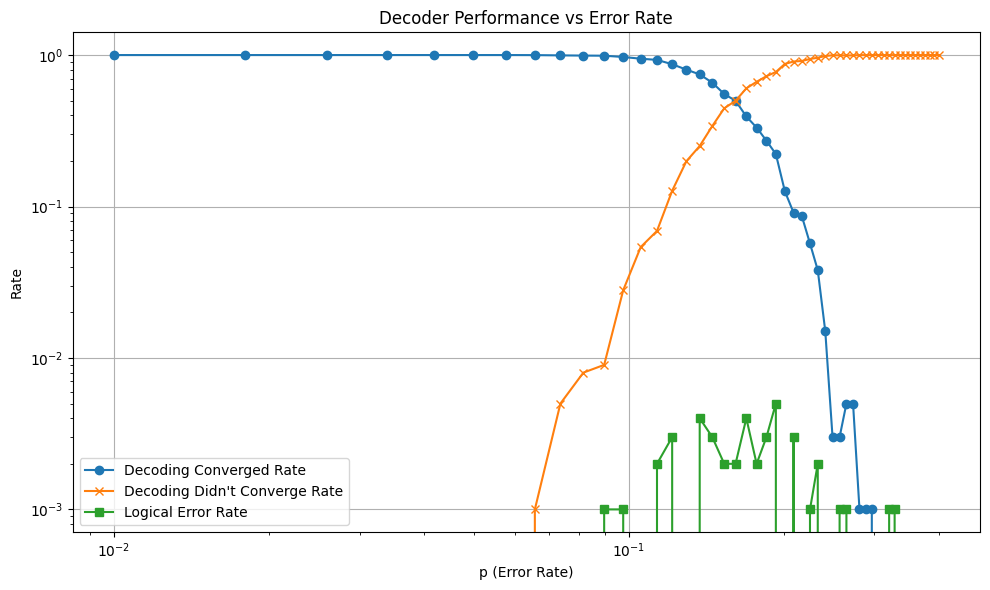

In [293]:
# Try different stabilizer shapes
shape_1 = np.array([[0, 1, 0],
                    [0, 1, 0],
                    [1, 0, 1]])


error_rates, success_rates, logical_rates, failure_rates = simulate_decoder_performance(
    H=8,
    L=17,
    m=3,
    stabilizer_shape=shape_1,
    num_trials=1000
)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(error_rates, success_rates, label='Decoding Converged Rate', marker='o')
plt.plot(error_rates, failure_rates, label='Decoding Didn\'t Converge Rate', marker='x')
plt.plot(error_rates, logical_rates, label='Logical Error Rate', marker='s')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('p (Error Rate)')
plt.ylabel('Rate')
plt.title('Decoder Performance vs Error Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# BP decoding performance for codeword made by stabilizer shape below
[0, 1, 0], <br>
[1, 1, 1], <br>
[0, 0, 0]

comparison between **decoding success rate** (converged) vs **decoding failure rate** (didn't converge) vs **logical error rate**

Stabilizer shape:
[[0 1 0]
 [1 1 1]
 [0 0 0]]
Rows: 3, Cols: 3
Generating H matrix of size 119 x 136


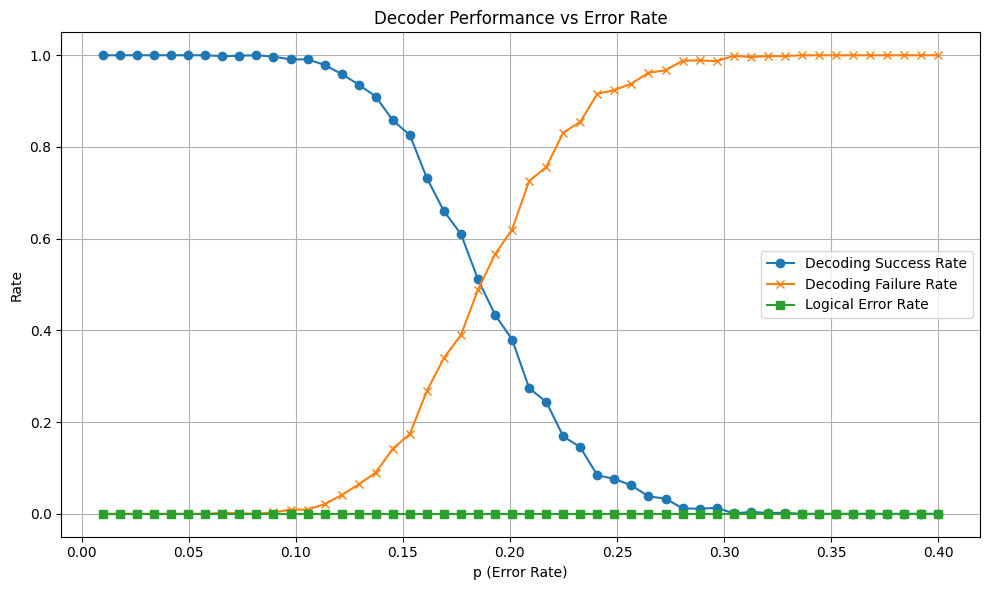

In [ ]:
shape_2 = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 0, 0]])

error_rates, success_rates, logical_rates, failure_rates = simulate_decoder_performance(
    H=8,
    L=17,
    m=2,
    stabilizer_shape=shape_2,
    num_trials=1000
)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(error_rates, success_rates, label='Decoding Success Rate', marker='o')
plt.plot(error_rates, failure_rates, label='Decoding Failure Rate', marker='x')
plt.plot(error_rates, logical_rates, label='Logical Error Rate', marker='s')

plt.xlabel('p (Error Rate)')
plt.ylabel('Rate')
plt.title('Decoder Performance vs Error Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# BP decoding performance for codeword made by stabilizer shape below
[0, 1, 0], <br>
[1, 0, 0], <br>
[1, 1, 0]

comparison between **decoding success rate** (converged) vs **decoding failure rate** (didn't converge) vs **logical error rate**

Stabilizer shape:
[[0 1 0]
 [1 0 0]
 [1 1 0]]
Rows: 3, Cols: 3
Generating H matrix of size 102 x 136


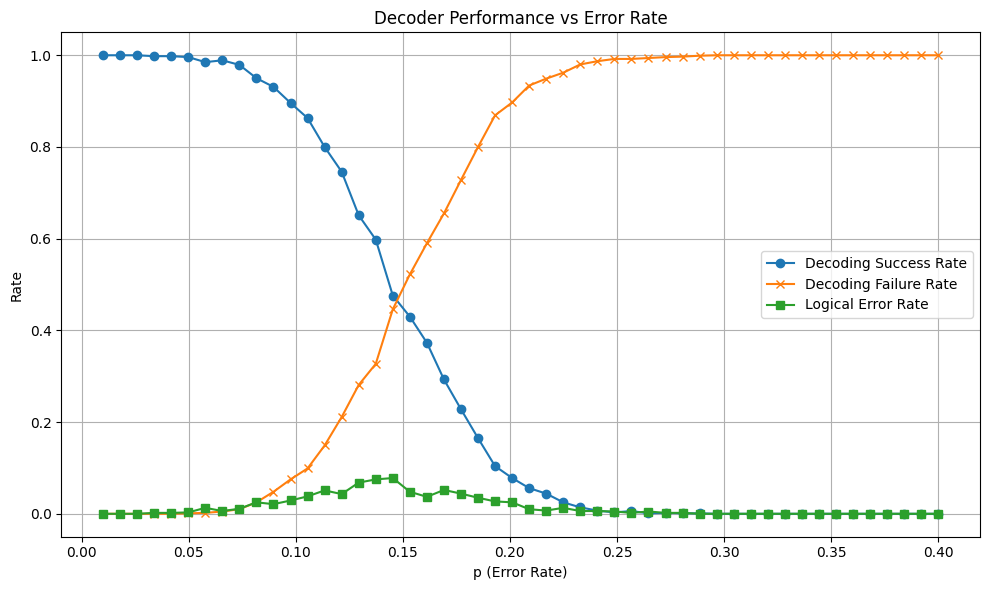

In [ ]:
shape_2 = np.array([[0, 1, 0],
                    [1, 0, 0],
                    [1, 1, 0]])

error_rates, success_rates, logical_rates, failure_rates = simulate_decoder_performance(
    H=8,
    L=17,
    m=3,
    stabilizer_shape=shape_2,
    num_trials=1000
)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(error_rates, success_rates, label='Decoding Success Rate', marker='o')
plt.plot(error_rates, failure_rates, label='Decoding Failure Rate', marker='x')
plt.plot(error_rates, logical_rates, label='Logical Error Rate', marker='s')

plt.xlabel('p (Error Rate)')
plt.ylabel('Rate')
plt.title('Decoder Performance vs Error Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# BP decoding performance for codeword made by stabilizer shape below
[0, 1, 0], <br>
[1, 1, 0], <br>
[0, 0, 1]

comparison between **decoding success rate** (converged) vs **decoding failure rate** (didn't converge) vs **logical error rate**

Stabilizer shape:
[[0 1 0]
 [1 1 0]
 [0 0 1]]
Rows: 3, Cols: 3
Generating H matrix of size 102 x 136


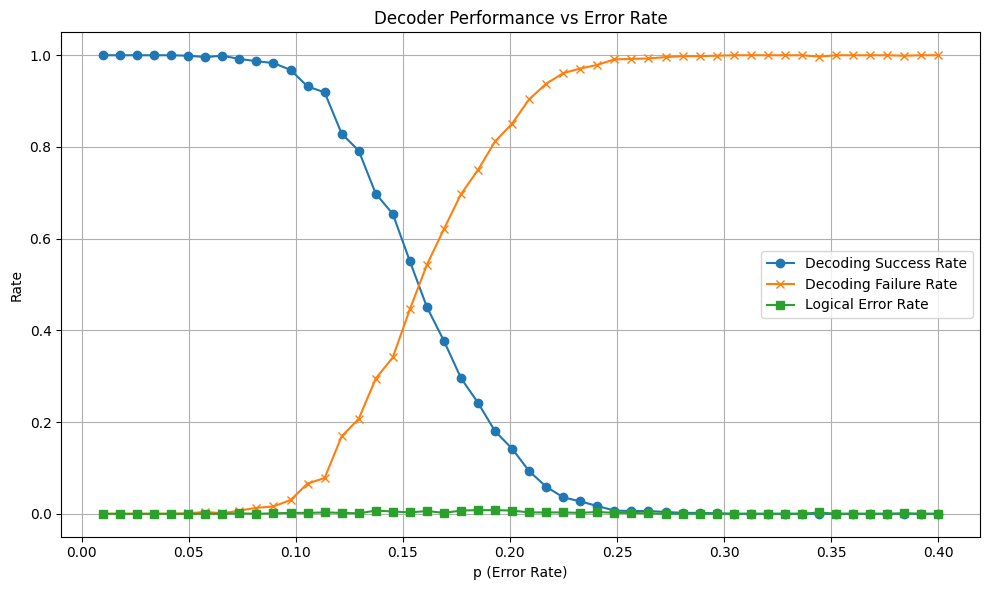

In [9]:
shape_2 = np.array([[0, 1, 0],
                    [1, 1, 0],
                    [0, 0, 1]])

error_rates, success_rates, logical_rates, failure_rates = simulate_decoder_performance(
    H=8,
    L=17,
    m=3,
    stabilizer_shape=shape_2,
    num_trials=1000
)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(error_rates, success_rates, label='Decoding Success Rate', marker='o')
plt.plot(error_rates, failure_rates, label='Decoding Failure Rate', marker='x')
plt.plot(error_rates, logical_rates, label='Logical Error Rate', marker='s')

plt.xlabel('p (Error Rate)')
plt.ylabel('Rate')
plt.title('Decoder Performance vs Error Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [279]:
import numpy as np
from itertools import combinations

stabilizer_shapes = []

# All possible positions in the bottom two rows (index 1 and 2), 3 columns each = 6 total positions
positions = [(i, j) for i in [1, 2] for j in range(3)]

# Iterate over all combinations of positions with weight 2 to 4
# for weight in range(1, 3):
weight = 4
for combo in combinations(positions, weight-1):
    shape = np.zeros((3, 3), dtype=int)
    shape[0, :] = [0, 1, 0]  # First row fixed
    for i, j in combo:
        shape[i, j] = 1
    stabilizer_shapes.append(shape)

# Optional: print them
print(f"{len(stabilizer_shapes)} stabilizer shapes with weight {weight}:")

success_rates_list = []

for shape in stabilizer_shapes:

    # compute m from the shape
    # if bottom row is all zeros, m = 2
    if np.all(shape[2, :] == 0):
        m = 2
    else:
        m = 3
    
    print(f"Shape:\n{shape}\nm: {m}")
    
    # Simulate decoder performance for each shape
    error_rates, success_rates, logical_rates, failure_rates = simulate_decoder_performance(
        H=8,
        L=17,
        m=m,
        stabilizer_shape=shape,
        num_trials=1000,
        error_range=(0.01, 0.4),
        num_points=50,
    )

    print(f"Shape:\n{shape}\nSuccess Rates: {success_rates}")

    success_rates_list.append(success_rates)


20 stabilizer shapes with weight 4:
Shape:
[[0 1 0]
 [1 1 1]
 [0 0 0]]
m: 2
Stabilizer shape:
[[0 1 0]
 [1 1 1]
 [0 0 0]]
Shape:
[[0 1 0]
 [1 1 1]
 [0 0 0]]
Success Rates: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.997, 0.996, 0.997, 0.994, 0.987, 0.982, 0.963, 0.932, 0.899, 0.877, 0.816, 0.747, 0.664, 0.618, 0.55, 0.41, 0.366, 0.292, 0.235, 0.177, 0.129, 0.096, 0.062, 0.05, 0.039, 0.02, 0.019, 0.012, 0.005, 0.003, 0.0, 0.001, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Shape:
[[0 1 0]
 [1 1 0]
 [1 0 0]]
m: 3
Stabilizer shape:
[[0 1 0]
 [1 1 0]
 [1 0 0]]
Shape:
[[0 1 0]
 [1 1 0]
 [1 0 0]]
Success Rates: [1.0, 1.0, 1.0, 0.996, 0.996, 0.987, 0.967, 0.955, 0.924, 0.914, 0.873, 0.813, 0.732, 0.689, 0.627, 0.538, 0.463, 0.379, 0.322, 0.259, 0.196, 0.15, 0.098, 0.068, 0.055, 0.04, 0.026, 0.015, 0.01, 0.007, 0.003, 0.001, 0.001, 0.001, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Shape:
[[0 1 0]
 [1 1 0]
 [0 1 0]]
m: 3
Stabilizer shape:
[[0 1 0]


Shape 1 
[[0 1 0]
 [1 1 1]
 [0 0 0]]
(AUC=0.18) is in the top 6

Shape 7 
[[0 1 0]
 [1 0 1]
 [0 0 1]]
(AUC=0.16) is in the top 6

Shape 5 
[[0 1 0]
 [1 0 1]
 [1 0 0]]
(AUC=0.16) is in the top 6

Shape 9 
[[0 1 0]
 [1 0 0]
 [1 0 1]]
(AUC=0.15) is in the top 6

Shape 18 
[[0 1 0]
 [0 0 1]
 [1 0 1]]
(AUC=0.15) is in the top 6

Shape 15 
[[0 1 0]
 [0 1 0]
 [1 0 1]]
(AUC=0.15) is in the top 6

Shape 4 
[[0 1 0]
 [1 1 0]
 [0 0 1]]
(AUC=0.15)

Shape 17 
[[0 1 0]
 [0 0 1]
 [1 1 0]]
(AUC=0.15)

Shape 10 
[[0 1 0]
 [1 0 0]
 [0 1 1]]
(AUC=0.15)

Shape 11 
[[0 1 0]
 [0 1 1]
 [1 0 0]]
(AUC=0.15)

Shape 8 
[[0 1 0]
 [1 0 0]
 [1 1 0]]
(AUC=0.14)

Shape 19 
[[0 1 0]
 [0 0 1]
 [0 1 1]]
(AUC=0.14)

Shape 16 
[[0 1 0]
 [0 1 0]
 [0 1 1]]
(AUC=0.13)

Shape 14 
[[0 1 0]
 [0 1 0]
 [1 1 0]]
(AUC=0.13)

Shape 20 
[[0 1 0]
 [0 0 0]
 [1 1 1]]
(AUC=0.13)

Shape 6 
[[0 1 0]
 [1 0 1]
 [0 1 0]]
(AUC=0.12)

Shape 13 
[[0 1 0]
 [0 1 1]
 [0 0 1]]
(AUC=0.12)

Shape 2 
[[0 1 0]
 [1 1 0]
 [1 0 0]]
(AUC=0.12)

Shape 3 
[[0

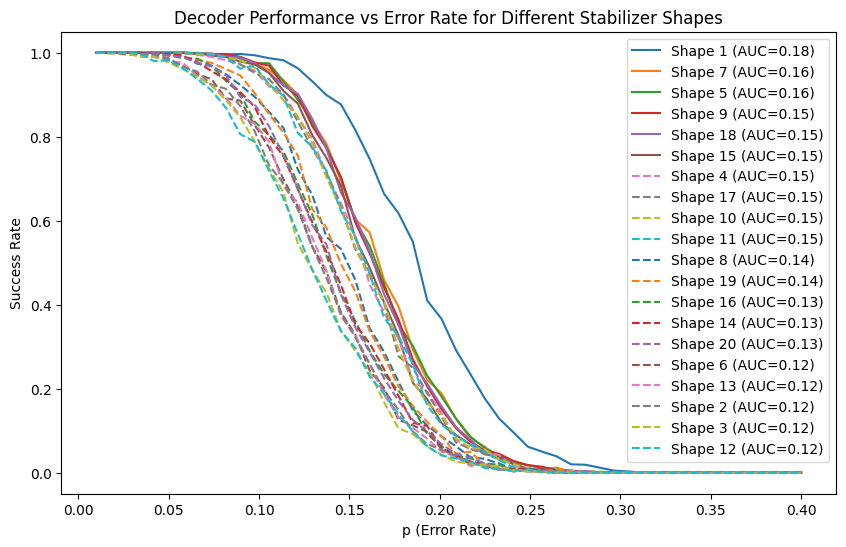

In [291]:
from sklearn.metrics import auc

# Sort by area under curve
shape_auc = [auc(error_rates, sr) for sr in success_rates_list]
sorted_indices = np.argsort(shape_auc)[::-1]  # Descending

plt.figure(figsize=(10, 6))
for rank, i in enumerate(sorted_indices):
    if rank < 6:  # Top 6 shapes
        style = '-'
        print(f"Shape {i+1} \n{stabilizer_shapes[i]}\n(AUC={shape_auc[i]:.2f}) is in the top 6\n")
    else:
        style = '--'
        print(f"Shape {i+1} \n{stabilizer_shapes[i]}\n(AUC={shape_auc[i]:.2f})\n")
    plt.plot(error_rates, success_rates_list[i], style, label=f'Shape {i+1} (AUC={shape_auc[i]:.2f})')
plt.xlabel('p (Error Rate)')
plt.ylabel('Success Rate')
plt.title('Decoder Performance vs Error Rate for Different Stabilizer Shapes')
plt.legend()

Shape 1:
[[0 1 0]
 [1 1 1]
 [0 0 0]]
Shape 2:
[[0 1 0]
 [1 1 0]
 [1 0 0]]
Shape 3:
[[0 1 0]
 [1 1 0]
 [0 1 0]]
Shape 4:
[[0 1 0]
 [1 1 0]
 [0 0 1]]
Shape 5:
[[0 1 0]
 [1 0 1]
 [1 0 0]]
Shape 6:
[[0 1 0]
 [1 0 1]
 [0 1 0]]
Shape 7:
[[0 1 0]
 [1 0 1]
 [0 0 1]]
Shape 8:
[[0 1 0]
 [1 0 0]
 [1 1 0]]
Shape 9:
[[0 1 0]
 [1 0 0]
 [1 0 1]]
Shape 10:
[[0 1 0]
 [1 0 0]
 [0 1 1]]
Shape 11:
[[0 1 0]
 [0 1 1]
 [1 0 0]]
Shape 12:
[[0 1 0]
 [0 1 1]
 [0 1 0]]
Shape 13:
[[0 1 0]
 [0 1 1]
 [0 0 1]]
Shape 14:
[[0 1 0]
 [0 1 0]
 [1 1 0]]
Shape 15:
[[0 1 0]
 [0 1 0]
 [1 0 1]]
Shape 16:
[[0 1 0]
 [0 1 0]
 [0 1 1]]
Shape 17:
[[0 1 0]
 [0 0 1]
 [1 1 0]]
Shape 18:
[[0 1 0]
 [0 0 1]
 [1 0 1]]
Shape 19:
[[0 1 0]
 [0 0 1]
 [0 1 1]]
Shape 20:
[[0 1 0]
 [0 0 0]
 [1 1 1]]


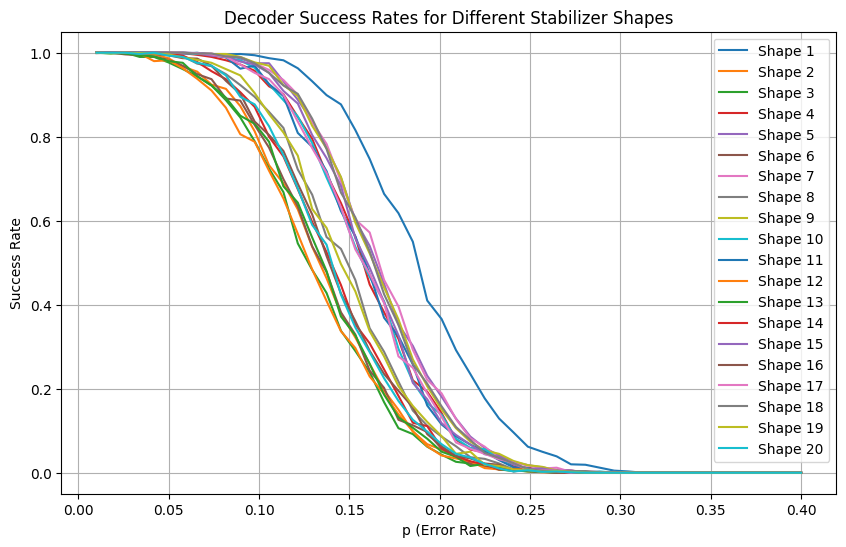

In [281]:
# Print all stabilizer shapes
for i, shape in enumerate(stabilizer_shapes):
    print(f"Shape {i+1}:\n{shape}")

# Plot only success rates for each stabilizer shape
plt.figure(figsize=(10, 6))
for i, success_rates in enumerate(success_rates_list):
    plt.plot(error_rates, success_rates, label=f'Shape {i+1} Success')
plt.xlabel('p (Error Rate)')
plt.ylabel('Success Rate')
plt.title('Decoder Success Rates for Different Stabilizer Shapes')
plt.legend([f'Shape {i+1}' for i in range(len(stabilizer_shapes))])
plt.grid(True)

<Figure size 1000x600 with 0 Axes>

In [265]:
import numpy as np
from itertools import combinations

stabilizer_shape = np.array([[0, 0, 1, 0, 0],
                             [1, 1, 1, 1, 1]])

m = 2

success_rates_list = []

# Simulate decoder performance for each shape
error_rates, success_rates, logical_rates, failure_rates = simulate_decoder_performance(
    H=8,
    L=17,
    m=m,
    stabilizer_shape=stabilizer_shape,
    num_trials=1000,
    error_range=(0.01, 0.4),
    num_points=50,
)

print(f"Shape:\n{shape}\nSuccess Rates: {success_rates}")




Stabilizer shape:
[[0 0 1 0 0]
 [1 1 1 1 1]]
Shape:
[[0 1 0]
 [0 0 0]
 [1 1 1]]
Success Rates: [1.0, 0.998, 0.998, 0.992, 0.986, 0.984, 0.967, 0.966, 0.936, 0.913, 0.885, 0.818, 0.763, 0.72, 0.634, 0.557, 0.472, 0.42, 0.368, 0.297, 0.26, 0.178, 0.144, 0.114, 0.083, 0.051, 0.049, 0.024, 0.018, 0.01, 0.011, 0.006, 0.001, 0.004, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


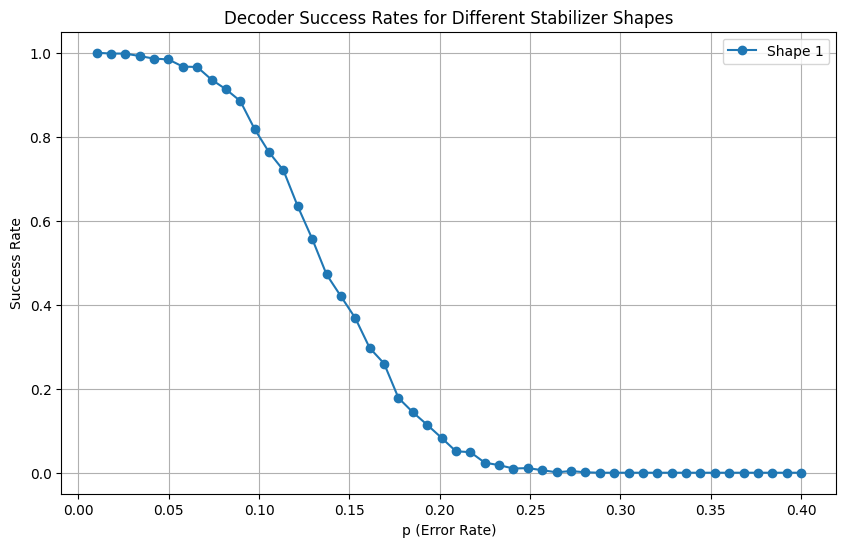

In [269]:
# Plot only success rates for each stabilizer shape
plt.figure(figsize=(10, 6))
# for i, success_rates in enumerate(success_rates_list):
#     plt.plot(error_rates, success_rates, label=f'Shape {i+1} Success')
plt.plot(error_rates, success_rates, label='Success Rate', marker='o')
plt.xlabel('p (Error Rate)')
plt.ylabel('Success Rate')
plt.title('Decoder Success Rates for Different Stabilizer Shapes')
plt.legend([f'Shape {i+1}' for i in range(len(stabilizer_shapes))])
plt.grid(True)

Simulating with max_iter = 4
Stabilizer shape:
[[0 1 0]
 [1 1 1]
 [0 0 0]]
Max Iter: 4, Logical Rates: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.002, 0.003, 0.002, 0.004, 0.008, 0.008, 0.011, 0.01, 0.011, 0.008, 0.012, 0.021, 0.015, 0.021, 0.013, 0.017, 0.02, 0.02, 0.023, 0.023, 0.028, 0.025, 0.025, 0.027, 0.026, 0.025, 0.027, 0.032, 0.037, 0.032, 0.027, 0.024, 0.022, 0.031, 0.026, 0.023, 0.02, 0.022, 0.032, 0.029, 0.03, 0.032, 0.028]
Simulating with max_iter = 1032
Stabilizer shape:
[[0 1 0]
 [1 1 1]
 [0 0 0]]
Max Iter: 1032, Logical Rates: [0.0, 0.0, 0.002, 0.005, 0.002, 0.007, 0.008, 0.012, 0.02, 0.027, 0.032, 0.04, 0.068, 0.054, 0.079, 0.09, 0.088, 0.103, 0.129, 0.138, 0.137, 0.164, 0.197, 0.183, 0.206, 0.221, 0.229, 0.232, 0.245, 0.237, 0.263, 0.269, 0.261, 0.288, 0.264, 0.273, 0.313, 0.282, 0.305, 0.299, 0.309, 0.314, 0.311, 0.298, 0.307, 0.3, 0.301, 0.32, 0.329, 0.325]
Simulating with max_iter = 5247
Stabilizer shape:
[[0 1 0]
 [1 1 1]
 [0 0 0]]
Max Iter: 5247, Logical Rates: [0.0

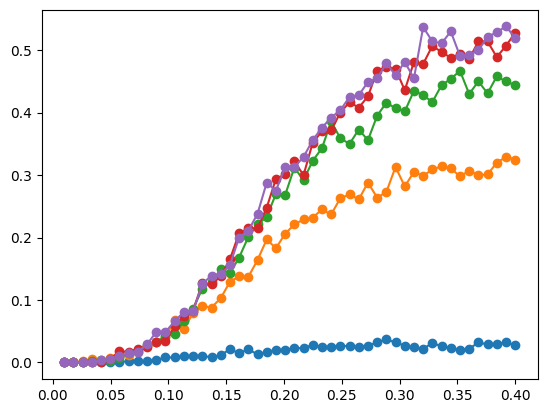

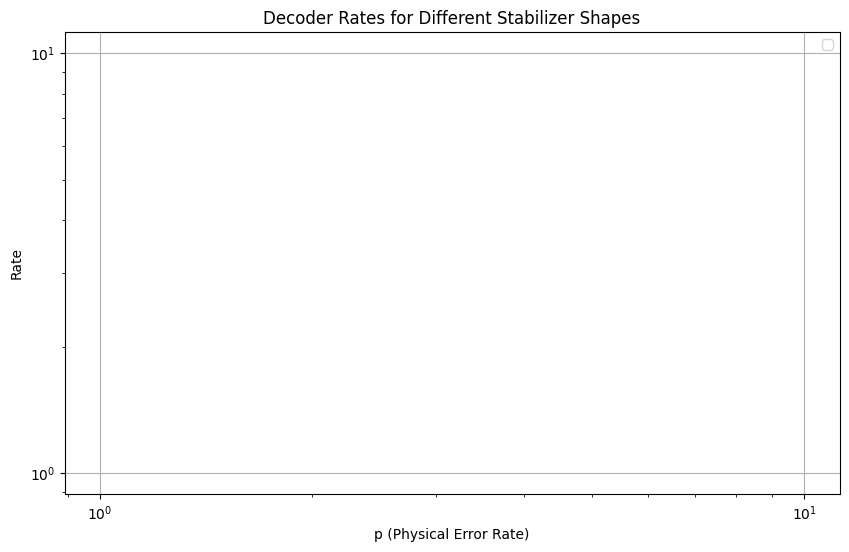

In [275]:
import numpy as np
from itertools import combinations

stabilizer_shape = np.array([[0, 1, 0],
                             [1, 1, 1],
                             [0, 0, 0]])

m = 2

max_iter_list = [4, 1032, 5247, 10000, 11365]
logical_rates_list = []

for max_iter in max_iter_list:
    print(f"Simulating with max_iter = {max_iter}")
    
    # Simulate decoder performance for each shape
    error_rates, success_rates, logical_rates, failure_rates = simulate_decoder_performance(
        H=3,
        L=10,
        m=m,
        stabilizer_shape=stabilizer_shape,
        num_trials=1000,
        error_range=(0.01, 0.4),
        num_points=50,
        max_iter=max_iter
    )
    print(f"Max Iter: {max_iter}, Logical Rates: {logical_rates}")
    logical_rates_list.append(logical_rates)

    plt.plot(error_rates, logical_rates, label=f'Max Iter {max_iter}', marker='o')

plt.figure(figsize=(10, 6))
plt.xlabel('p (Physical Error Rate)')
plt.ylabel('Rate')
plt.title('Decoder Rates for Different Stabilizer Shapes')
plt.legend([f'Shape {i+1}' for i in range(len(stabilizer_shapes))])
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
